In [1]:
from matplotlib import pyplot as plt
from graph import create_random_graph , to_useful, assign_states
import networkx as nx
from model import create_model
import tensorflow as tf
from mutate import mutate_dag
from crossover import crossover
from Individual import Individual
from Generation import Generation

2023-12-01 11:45:17.756598: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 11:45:17.789146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 11:45:17.789190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 11:45:17.790365: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 11:45:17.796472: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 11:45:17.797407: I tensorflow/core/platform/cpu_feature_guard.cc:1

input


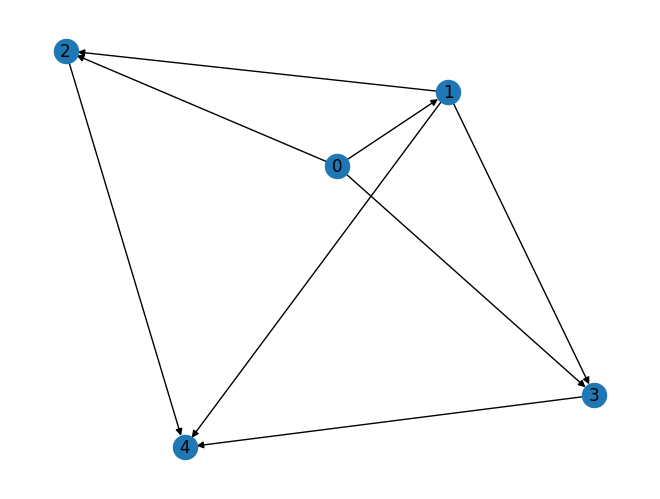

In [ ]:
g1 = create_random_graph(5,0.8)
g1 = assign_states(g1,(1,3,1))
print(g1.nodes[0]['state'])
nx.draw(g1, with_labels=True)
plt.draw()

0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


OutEdgeDataView([(0, 1, {'_igraph_index': 0}), (0, 2, {'_igraph_index': 1}), (0, 3, {'_igraph_index': 3}), (1, 2, {'_igraph_index': 2}), (1, 3, {'_igraph_index': 4}), (1, 4, {'_igraph_index': 5}), (2, 4, {'_igraph_index': 6}), (3, 4, {'_igraph_index': 7})])

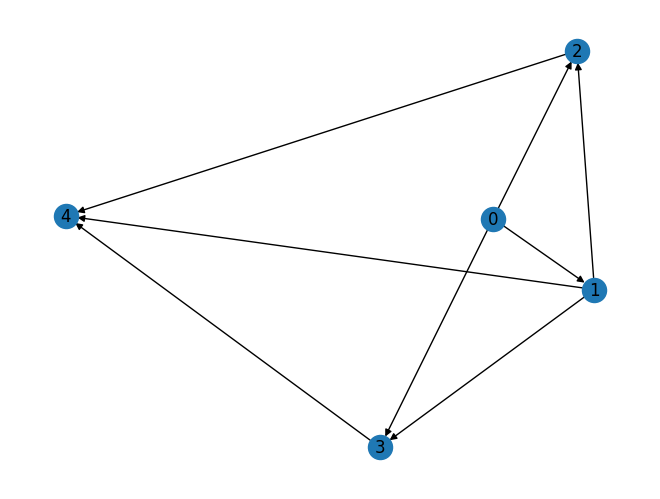

In [ ]:
g1 = to_useful(g1,(1,3,1))
nx.draw(g1, with_labels=True)
plt.draw()
g1.edges(data=True)

In [ ]:
g1.nodes

NodeView((0, 1, 2, 3, 4))

In [ ]:
import mnist
import numpy as np
import matplotlib.pyplot as plt

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_images = (train_images / 255) 
test_images = (test_images / 255) 
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:10000]
test_labels = test_labels[:10000]
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
model = create_model(g1,(28,28,1),10)

[1, 2, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 2) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 2) dtype=float32 (created by layer '3')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]


In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 1 (AveragePooling2D)        (None, 28, 28, 1)            0         ['input_layer[0][0]']         
                                                                                                  
 2_concatenate (Concatenate  (None, 28, 28, 2)            0         ['input_layer[0][0]',         
 )                                                                   '1[0][0]']                   
                                                                                                  
 3_concatenate (Concatenate  (None, 28, 28, 2)            0         ['input_layer[0][0]',     

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
#model.fit(train_images, train_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)

2023-12-01 11:32:10.866688: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 60s 191ms/step - loss: 2.3104 - accuracy: 0.1135


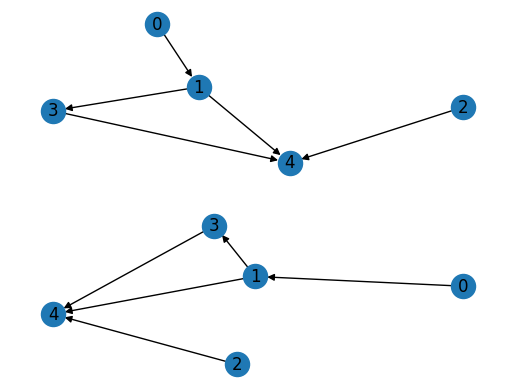

In [ ]:
g1 = create_random_graph(5,0.5)
g1 = assign_states(g1,(1,3,1))
fig , ax = plt.subplots(2,1)
g3 = mutate_dag(g1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g3, with_labels=True, ax=ax[1])
plt.draw()


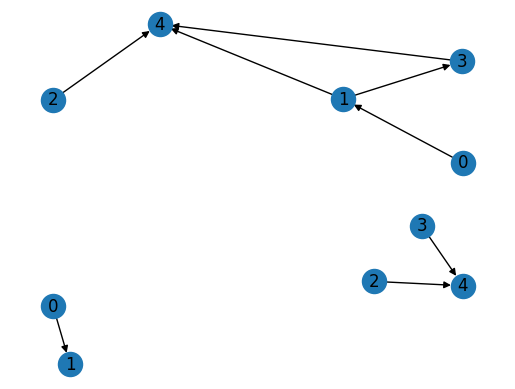

In [ ]:
g4 = crossover(g1,g3)
fig , ax = plt.subplots(2,1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g4, with_labels=True, ax=ax[1])
plt.draw()

0 1
True
0 2
True
0 3
True
1 4
True
2 4
True
3 4
True


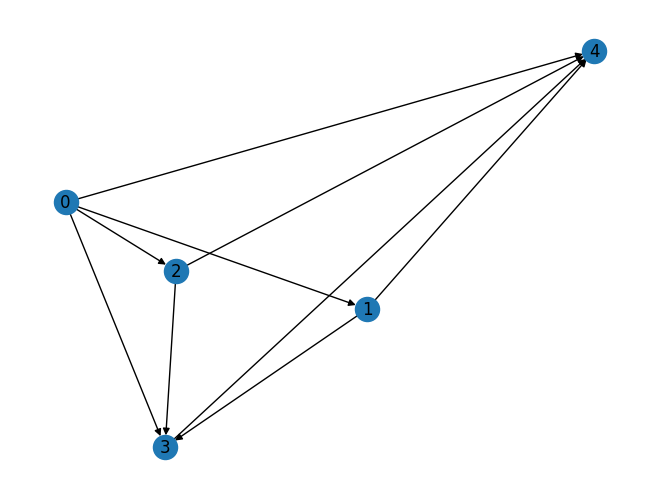

[0, 1, 2, 3] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 14) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 14) dtype=float32 (created by layer '3')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '4')>]
Epoch 1/5


2023-12-01 11:33:35.822583: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25088000 exceeds 10% of free system memory.


800/800 [==============================] - 5s 6ms/step - loss: 0.3744 - accuracy: 0.1190
Epoch 2/5
800/800 [==============================] - 5s 6ms/step - loss: 0.3242 - accuracy: 0.1764
Epoch 3/5
800/800 [==============================] - 4s 5ms/step - loss: 0.3216 - accuracy: 0.1930
Epoch 4/5
800/800 [==============================] - 4s 5ms/step - loss: 0.3181 - accuracy: 0.1982
Epoch 5/5
63/63 [==============================] - 1s 9ms/step


(3341.2259054773103,
 0.3139286935329437,
 0.20149999856948853,
 618,
 0.6442093730584796)

In [ ]:
in1 = Individual((28,28,1),(10),(1,3,1),5,0.9)
in1.score(test_images,test_labels)

0 1
True
0 2
True
0 3
True
0 4
True
0 5
True
1 6
True
2 6
True
3 6
True
4 6
True
5 6
True


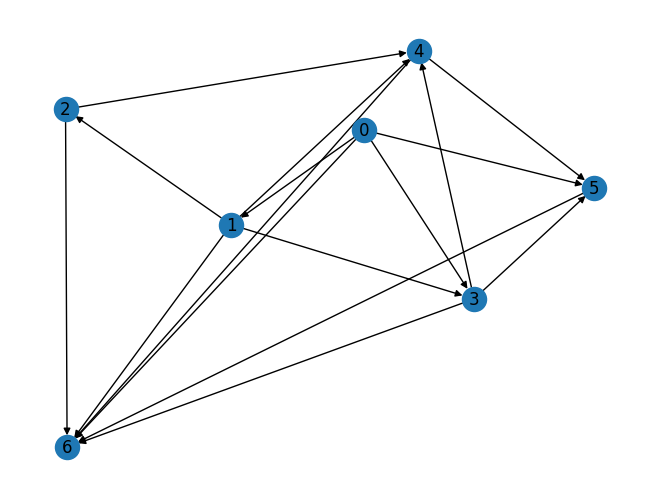

[0, 1, 2, 3, 4, 5] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 2) dtype=float32 (created by layer '3')>, 4: <KerasTensor: shape=(None, 28, 28, 4) dtype=float32 (created by layer '4')>, 5: <KerasTensor: shape=(None, 28, 28, 26) dtype=float32 (created by layer '5')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '6')>]
0 1
True
0 2
False
removing j
0 3
True
0 4
True
0 5
True
1 6
True
2 6
3 6
True
4 6
True
5 6
True


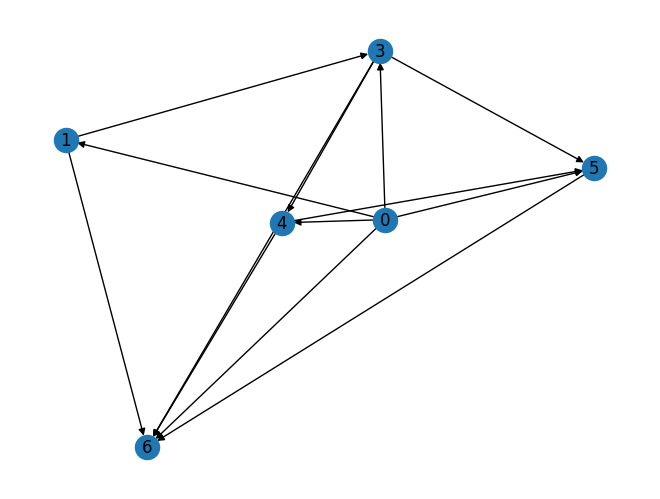

[0, 1, 3, 4, 5] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 9) dtype=float32 (created by layer '1')>, 3: <KerasTensor: shape=(None, 28, 28, 10) dtype=float32 (created by layer '3')>, 4: <KerasTensor: shape=(None, 28, 28, 11) dtype=float32 (created by layer '4')>, 5: <KerasTensor: shape=(None, 28, 28, 22) dtype=float32 (created by layer '5')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '6')>]
0 1
True
0 2
True
0 3
True
0 4
True
0 5
True
1 6
True
2 6
True
3 6
True
4 6
True
5 6
True


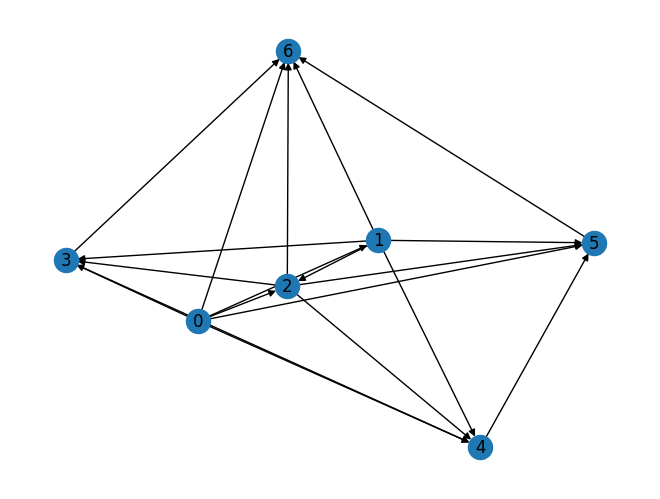

[0, 1, 2, 3, 5] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 2) dtype=float32 (created by layer '2')>, 3: <KerasTensor: shape=(None, 28, 28, 4) dtype=float32 (created by layer '3')>, 4: <KerasTensor: shape=(None, 28, 28, 21) dtype=float32 (created by layer '4')>, 5: <KerasTensor: shape=(None, 28, 28, 25) dtype=float32 (created by layer '5')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '6')>]
0 1
False
removing j
0 2
True
0 3
True
0 4
True
0 5
True
1 6
2 6
True
3 6
True
4 6
True
5 6
True


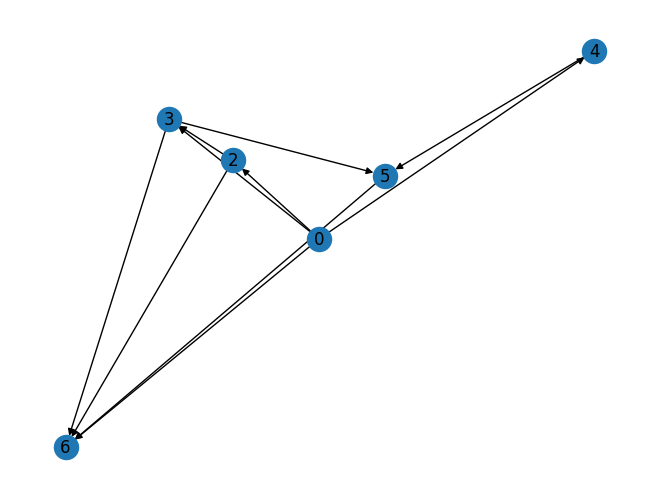

[0, 2, 3, 5] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 2: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer '2')>, 4: <KerasTensor: shape=(None, 28, 28, 4) dtype=float32 (created by layer '4')>, 3: <KerasTensor: shape=(None, 28, 28, 28) dtype=float32 (created by layer '3')>, 5: <KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer '5')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '6')>]
0 1
True
0 2
True
0 3
True
0 4
True
0 5
True
1 6
True
2 6
True
3 6
True
4 6
True
5 6
True


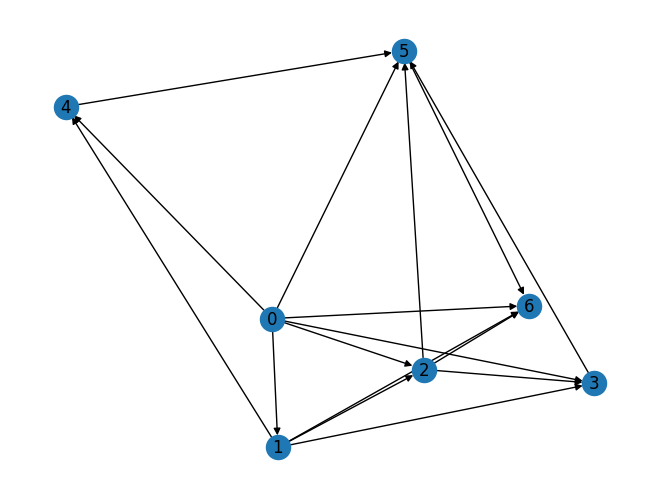

[0, 1, 2, 5] {0: <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, 1: <KerasTensor: shape=(None, 28, 28, 26) dtype=float32 (created by layer '1')>, 2: <KerasTensor: shape=(None, 28, 28, 27) dtype=float32 (created by layer '2')>, 4: <KerasTensor: shape=(None, 28, 28, 27) dtype=float32 (created by layer '4')>, 3: <KerasTensor: shape=(None, 28, 28, 15) dtype=float32 (created by layer '3')>, 5: <KerasTensor: shape=(None, 28, 28, 23) dtype=float32 (created by layer '5')>}
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '6')>]
Epoch 1/5
  5/800 [..............................] - ETA: 32s - loss: 0.7827 - accuracy: 0.1600

2023-12-01 11:34:01.487305: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28449792 exceeds 10% of free system memory.
2023-12-01 11:34:01.522746: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28449792 exceeds 10% of free system memory.
2023-12-01 11:34:01.581695: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28449792 exceeds 10% of free system memory.


800/800 [==============================] - 29s 36ms/step - loss: 0.3486 - accuracy: 0.1532
Epoch 2/5
800/800 [==============================] - 29s 36ms/step - loss: 0.3179 - accuracy: 0.1986
Epoch 3/5
800/800 [==============================] - 29s 36ms/step - loss: 0.3119 - accuracy: 0.2177
Epoch 4/5
800/800 [==============================] - 29s 36ms/step - loss: 0.3069 - accuracy: 0.2288
Epoch 5/5
63/63 [==============================] - 5s 87ms/step
Epoch 1/5
800/800 [==============================] - 140s 174ms/step - loss: 0.3631 - accuracy: 0.0970
Epoch 2/5
800/800 [==============================] - 139s 174ms/step - loss: 0.3242 - accuracy: 0.1402
Epoch 3/5
756/800 [===========================>..] - ETA: 8s - loss: 0.3225 - accuracy: 0.1718

In [ ]:
ga = Generation(input_size=(28,28,1),output_size=(10),states=(1,3,1),nodes=5,edges=0.7,population=3,limit=7,X=train_images,y=train_labels)
ga.run(10,test_images,test_labels,0.1,0.1)